# Optimize with SciPy

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.optimize as optimize

### (1.1) 1D-function

Let's consider the function $ f : x \rightarrow x^2 - 20 \cdot  cos(x) $

In [2]:
def f(x):
    return (x**2 - 20 * np.cos(x))

❓ Plot this function with the *x-axis* below between -10 and +10 ❓

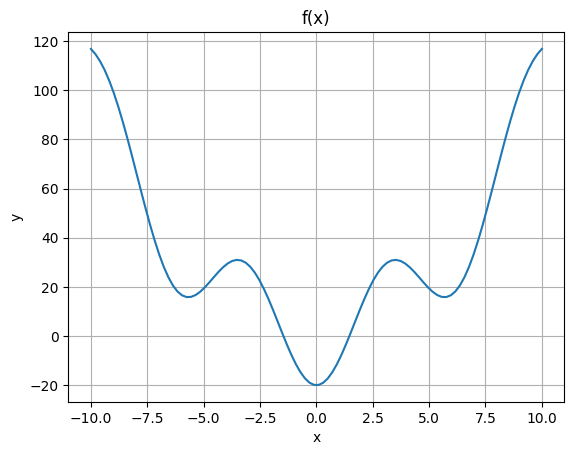

In [3]:
x = np.linspace(-10, 10, 100)
y = f(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("f(x)")
plt.grid(True)

❓ Try to find the **local minimum of $f$**, from a starting point `x0`, using `optimize.minimize()` ❓

In [4]:
x0 = 0
local_min = optimize.minimize(f, x0)
print(local_min)
print(f"x = {local_min.x[0]}")
print(f"f(x) = {local_min.fun}")

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -20.0
        x: [ 0.000e+00]
      nit: 0
      jac: [ 2.384e-07]
 hess_inv: [[1]]
     nfev: 2
     njev: 1
x = 0.0
f(x) = -20.0


### (1.2)  2D-function

As we saw in the previous exercise, finding the minimum of a function with more than one parameter becomes rapidly complex. Let's try it out with a multivariate function: $$ g : (x,y) \rightarrow -(y + 47) \cdot   sin(\sqrt{\lvert\frac{x}{2} + (y  + 47) \rvert} ) \
        -x \cdot sin(\sqrt{\lvert x - (y  + 47)\rvert}) $$

In [5]:
def g(X):
    return -(X[1] + 47) * np.sin(np.sqrt(abs(X[0]/2 + (X[1]  + 47)))) \
        -X[0] * np.sin(np.sqrt(abs(X[0] - (X[1]  + 47))))

❓ Run the cell below to visualize `g` in 3D ❓

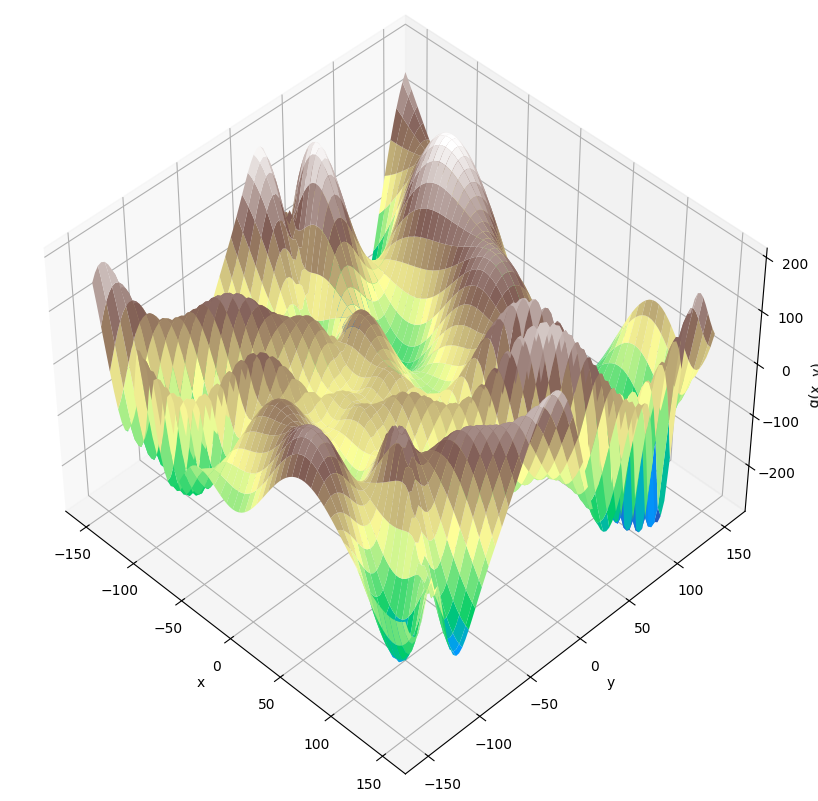

In [6]:
# Build a (50*50) meshgrid
x = np.linspace(-150,150,100) # shape(100,1)
y = np.linspace(-150,150,100) # shape(100,1)
xx, yy = np.meshgrid(x,y) # x and y of shape(100,100)
zz = np.array([xx, yy]) # (2, 100, 100)

# Compute Z, a 2D-array containing g(x,y) for each (x,y) in the meshgrid
Z = g(zz)

# Plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, Z, cmap='terrain')
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('g(x, y)'); ax.view_init(45, -45);
plt.show()

❓Initialize a starting point `X0` ❓

In [7]:
X0 = np.array([0, 0])

❓Find a `minimum` using `optimize.minimize()` ❓

In [8]:
# Compute and store the minimum inside a `minimum` variable
minimum = optimize.minimize(g, X0)
print(minimum)
minimum = minimum.x

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -66.84371732945766
        x: [ 8.457e+00  1.565e+01]
      nit: 8
      jac: [-9.537e-07  1.907e-06]
 hess_inv: [[ 6.831e+00 -1.120e+00]
            [-1.120e+00  3.634e+00]]
     nfev: 30
     njev: 10


❓Does this look like the absolute minimum ❓ Check it out below ❓

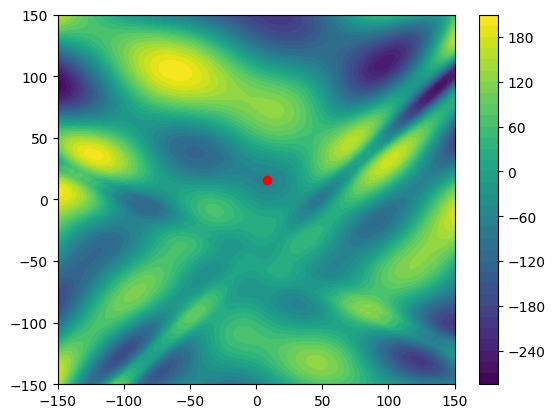

In [9]:
x = np.linspace(-150,150,100) # shape(100,1)
y = np.linspace(-150,150,100) # shape(100,1)
xx, yy = np.meshgrid(x,y) # x and y of shape(100,100)
zz = np.array([xx,yy]) # shape(2, 100, 100)

plt.contourf(xx,yy,g(zz), 40)
plt.colorbar()
plt.scatter(minimum[0], minimum[1], c='r')

### (1.3) Minimize under constraint(s) 🔥

👉 In real world problems, we often want to minimize a function $h(\textbf{x})$, **given a set of constraints on the values of $\textbf{x}$ itself**.   

🎒 See for instance, the famous [Knapsack problem](https://en.wikipedia.org/wiki/Knapsack_problem) 

👩🏻‍🏫 As often in Mathematics, **the hardest part is not to solve the equations but to convert your real-world problem into mathematical equations**. But for the sake of this challenge, let's assume we came with the following problem statement:

---
Find $\textbf{x}$ that minimizes $h(\textbf{x}) = x_1 x_4 (x_1 + x_2 + x_3) + x_3$  

Given the following constraints


$[1]\ \ x_1^2 + x_2^2 + x_3^2 + x_4^2 = 40$  (*equality constraint*)

$[2]\ \ x_1 x_2 x_3 x_4 \leqslant 25$ (*inequality constraint*)

$[3]\ \ 1 \leqslant x_1, x_2, x_3, x_4 \leqslant 5$ (*bounds*)

--- 

In [10]:
# Define your objective function h(X) that you want to minimize
# X being a 1D-array of length 4

def h(X):
    x1, x2, x3, x4 = X
    return x1 * x4 *(x1 + x2 + x3) + x3

In [11]:
# Define a function constraint1(X) that returns 0 if and only if equation [1] is True
# Otherwise it should return any other number

def constraint1(X):
    x1, x2, x3, x4 = X
    return x1 ** 2 + x2 ** 2 + x3 ** 2 + x4 ** 2 - 40

# Define a function constraint2(X) that returns a positive number if and only if equation [2] is True
# Otherwise it should return a negative number 
def constraint2(X):
    x1, x2, x3, x4 = X
    return x1 * x2 * x3 * x4 - 25

In [12]:
con1 = {"type": "eq", "fun": constraint1}
con2 = {"type": "ineq", "fun": constraint2}
constraints = [con1, con2]

In [13]:
# Create bounds
bounds = [(1, 5),(1, 5),(1, 5), (1, 5)]

In [14]:
# Finally, define any starting point X0 for the minimization algorithm
X0 = np.array([1, 5, 5, 1])

❓ Now, try to find the minimum of your objective function `h` under such constraints using `optimize.minimize` ❓

In [15]:
# Minimize under constraints
minimize_h = optimize.minimize(h, X0, bounds=bounds, constraints=constraints)
minimize_h

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 17.01401724556073
       x: [ 1.000e+00  4.743e+00  3.821e+00  1.379e+00]
     nit: 5
     jac: [ 1.457e+01  1.379e+00  2.379e+00  9.564e+00]
    nfev: 25
    njev: 5

In [16]:
# Store the minimum in a `local_minimum` variable
if minimize_h.success:
    local_minimum = minimize_h.x
    print(local_minimum)
else:
    print("Can't be minimized")

[1.         4.74299607 3.82115466 1.37940764]


In [17]:
# Check constraints
constraint1(local_minimum)
constraint2(local_minimum)

-5.487420651206776e-08

#### (2) Global Optimization

❓Try to use the two functions to find the global minima for our previous 2D-function $g(x,y)$, bounded between -150 and +150 ❓

In [18]:
# Define a variable `bounds` with boundaries
bounds = [(-150, 150), (-150, 150)]

In [19]:
# Compute the global minimum `minimum_shgo` with the optimize.shgo method
minimum_shgo = optimize.shgo(g, bounds)
minimum_shgo = minimum_shgo.x

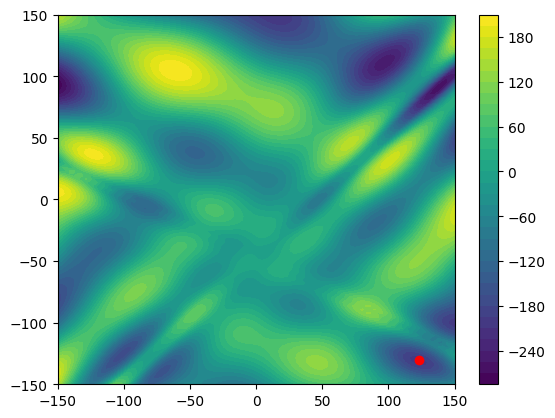

In [20]:
# Try this out

x = np.linspace(-150,150,100) # shape(100,1)
y = np.linspace(-150,150,100) # shape(100,1)
xx, yy = np.meshgrid(x,y) # x and y of shape(100,100)
zz = np.array([xx,yy]) # shape(2, 100, 100)

plt.contourf(xx,yy,g(zz), 40)
plt.colorbar()
plt.scatter(minimum_shgo[0], minimum_shgo[1], c='r')

In [21]:
# Compute the global minimum `minimum_dual` with the optimize.dual_annealing method
minimum_dual = optimize.dual_annealing(g, bounds)
minimum_dual = minimum_dual.x

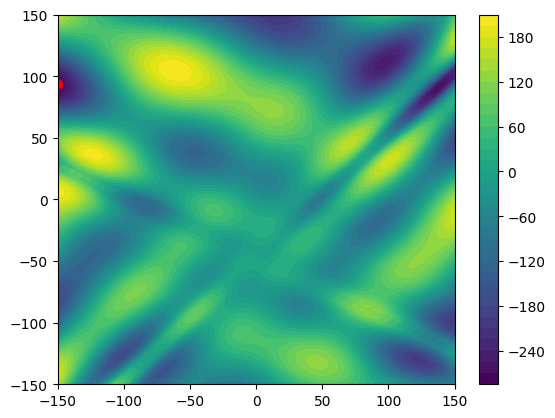

In [22]:
x = np.linspace(-150,150,100) # shape(100,1)
y = np.linspace(-150,150,100) # shape(100,1)
xx, yy = np.meshgrid(x,y) # x and y of shape(100,100)
zz = np.array([xx,yy]) # shape(2, 100, 100)

plt.contourf(xx,yy,g(zz), 40)
plt.colorbar()
plt.scatter(minimum_dual[0], minimum_dual[1], c='r')

## (3) Aproximations

### (3.1) Fitting a scatter plot

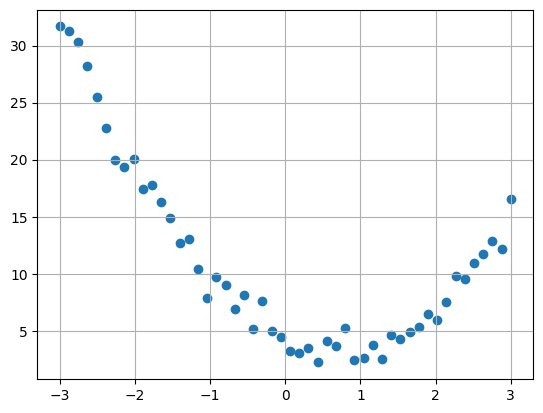

In [23]:
x = np.array([-3.        , -2.87755102, -2.75510204, -2.63265306, -2.51020408,
       -2.3877551 , -2.26530612, -2.14285714, -2.02040816, -1.89795918,
       -1.7755102 , -1.65306122, -1.53061224, -1.40816327, -1.28571429,
       -1.16326531, -1.04081633, -0.91836735, -0.79591837, -0.67346939,
       -0.55102041, -0.42857143, -0.30612245, -0.18367347, -0.06122449,
        0.06122449,  0.18367347,  0.30612245,  0.42857143,  0.55102041,
        0.67346939,  0.79591837,  0.91836735,  1.04081633,  1.16326531,
        1.28571429,  1.40816327,  1.53061224,  1.65306122,  1.7755102 ,
        1.89795918,  2.02040816,  2.14285714,  2.26530612,  2.3877551 ,
        2.51020408,  2.63265306,  2.75510204,  2.87755102,  3.        ])
y = np.array([31.66815357, 31.26229494, 30.3467807 , 28.2057809 , 25.47674964,
       22.81398414, 19.93953021, 19.38250362, 20.02551935, 17.44468883,
       17.80733403, 16.29808282, 14.85006259, 12.69760597, 13.04075803,
       10.42420089,  7.91118094,  9.72737214,  9.05962483,  6.89984054,
        8.15068899,  5.15772899,  7.65448235,  4.95987628,  4.4284636 ,
        3.22183541,  3.05456124,  3.49253584,  2.23478284,  4.15163314,
        3.68063488,  5.22556445,  2.47139029,  2.66785497,  3.72557952,
        2.56255802,  4.61385762,  4.28234911,  4.91138639,  5.31724926,
        6.52053679,  5.94175001,  7.5368359 ,  9.78905172,  9.5795072 ,
       10.95610291, 11.73051576, 12.85008617, 12.2184079 , 16.52977769])
plt.scatter(x,y)
plt.grid(True)

❓ Define the function $\large f$ of degree two with parameters $ \large (a,b,c) $ ❓

In [24]:
def f(x,a,b,c):
    return a *x ** 2 +b * x + c

In [25]:
optimize.curve_fit(f, x, y)

(array([ 2.17083046, -3.0087075 ,  4.31968534]),
 array([[ 2.83060958e-03,  5.70112271e-12, -8.83843408e-03],
        [ 5.70112271e-12,  7.06225905e-03, -7.15333106e-11],
        [-8.83843408e-03, -7.15333106e-11,  4.96491035e-02]]))

* The first array contains the coefficients $(a,b,c)$ that have been computed to minimize squared errors between $f$ and the dataset.


❓Plot your quadratic estimator on top of the scatter plot to check that it fits! ❓

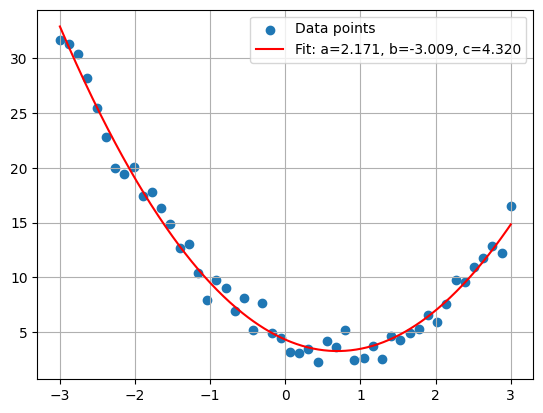

In [26]:
params = optimize.curve_fit(f, x, y)
x_line = np.linspace(min(x), max(x), 500)
y_line = f(x_line, params[0][0], params[0][1], params[0][2])

plt.scatter(x, y, label="Data points")
plt.plot(x_line, y_line, color="red", label="Fit: a=%5.3f, b=%5.3f, c=%5.3f" % tuple(params[0]))
plt.grid(True)
plt.legend();

## (3.2) Interpolate

🚀 As with any spreadsheet software, we often want to quickly fill the blanks in a series of datapoints. We'll use [`scipy.interpolate`](https://docs.scipy.org/doc/scipy/reference/interpolate.html)

In [27]:
from scipy import interpolate

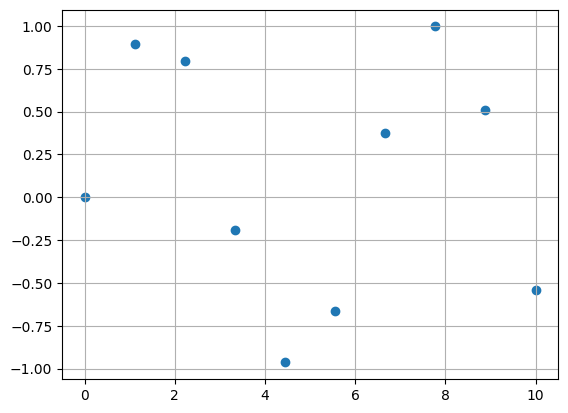

In [28]:
x = np.linspace(0, 10, 10)
y = np.array([ 0.        ,  0.8961922 ,  0.79522006, -0.19056796, -0.96431712,
       -0.66510151,  0.37415123,  0.99709789,  0.51060568, -0.54402111])
plt.grid(True)
plt.scatter(x, y);

In [29]:
f_interpolated = interpolate.interp1d(x,y, kind='linear')
f_interpolated

❓ Now, you can call your interpolated function with any continuous values for $x$ in the initial range. Visualize it with a new plot and a dense `linspace` for $x$. Feel free to try other `kind` of interpolations such as `quadratic` or `cubic`

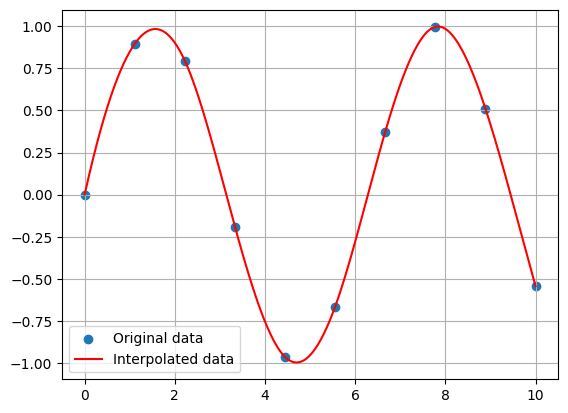

In [30]:
f_interpolated = interpolate.interp1d(x,y, kind="cubic")
x_dense = np.linspace(0, 10, 1000)

y_dense = f_interpolated(x_dense)

plt.scatter(x, y, label="Original data")
plt.plot(x_dense, y_dense, label="Interpolated data", color="red")
plt.grid(True)
plt.legend();